# ```sampley``` exemplar: the point approach
Before going through this exemplar, please consult the Introduction to sampley exemplars (```intro.ipynb```).
<br>This exemplar illustrates an application of the point approach to data contained within two files: one containing survey tracks (```sections.gpkg```) and one containing sightings data (```sightings.gpkg```).

## Setup

### Import the package

In [1]:
from sampley import *

### Set the input folder
To run this exemplar, download the mock data files, put them in a folder, and set the path to the folder below.

In [2]:
input_folder = './input/'

### Set the output folder
To run this exemplar, make a folder to save the outputs in and set the path to the folder below.

In [3]:
output_folder = './output/'

## Stage 1
In Stage 1, we import two files (```sightings.csv``` and ```sections.gpkg```) and from them make a ```DataPoints``` and a ```Sections``` object, respectively.
<br>Although we use a CSV file and a GPKG file in this exemplar, there are other options for file types (including XLSX and SHP files). Please see the Stage 1 exemplar (```stage-1.ipynb```) in the horizontal exemplars folder or the User Manual for more details. Note that, regardless of the input file type, once any ```DataPoints``` and/or ```Sections``` objects have been made, the subsequent processing will be the same.

In [4]:
u_sightings = DataPoints.from_file(
    filepath=input_folder+'sightings.csv',
    x_col='lon',
    y_col='lat',
    crs_input='EPSG:4326',
    crs_working='EPSG:32619',
    datetime_col='datetime',
    tz_input='UTC-05:00'
)

Success: file opened.
Success: X and Y coordinates parsed.
Success: reprojected to CRS "EPSG:32619"
Success: column "datetime" reformatted to datetimes.
Success: timezone of column "datetime" set to "UTC-05:00".
Success: datapoint IDs generated.


In [5]:
u_sections = Sections.from_file(
    filepath=input_folder+'sections.gpkg',
    crs_working='EPSG:32619',
    datetime_col='datetime_beg',
    tz_input='UTC-05:00'
)

Success: file opened.
Success: reprojected to CRS "EPSG:32619"
Success: column "datetime_beg" reformatted to datetimes.
Success: timezone of column "datetime_beg" set to "UTC-05:00".
Note: column "datetime_beg" renamed to "datetime".
Success: section IDs generated.


## Stage 2
In Stage 2, we use the ```DataPoints``` object containing sightings data to make a ```Presences``` object which we thin with a spatial threshold of 10000 m and a temporal threshold of 5 days.
<br>Then, we use the ```Presences``` object and the ```Sections``` object to make a ```PresenceZones``` object with the same thresholds. It should be noted that the presence zones object is made from all the presences, not only those kept after spatial thinning.
<br>Finally, we use the ```Sections``` object and the ```PresenceZones``` object to make an ```Absences``` object. We also thin these absences with the same thresholds as well as a target equal to the number of presences kept after thinning.

In [6]:
u_presences = Presences.delimit(datapoints=u_sightings)
u_presences.thin(
    sp_threshold=10000,
    tm_threshold=5,
    tm_unit='day')

In [7]:
u_presences.full  # print the presences GeoDataFrame

,point_id,point,date,datapoint_id
0,p01,POINT (579166.78 4742872.701),2019-01-25,d01
1,p02,POINT (554184.217 4742741.886),2019-01-25,d02
2,p03,POINT (548599.876 4742700.214),2019-01-25,d03
3,p04,POINT (520909.741 4714855.058),2019-02-02,d04
4,p05,POINT (532548.249 4714899.835),2019-02-02,d05
5,p06,POINT (512817.407 4705582.465),2019-02-02,d06
6,p07,POINT (504710.41 4705553.392),2019-02-02,d07
7,p08,POINT (654449.136 4716189.584),2019-02-05,d08
8,p09,POINT (645666.237 4716110.937),2019-02-05,d09
9,p10,POINT (643532.681 4716066.52),2019-02-05,d10


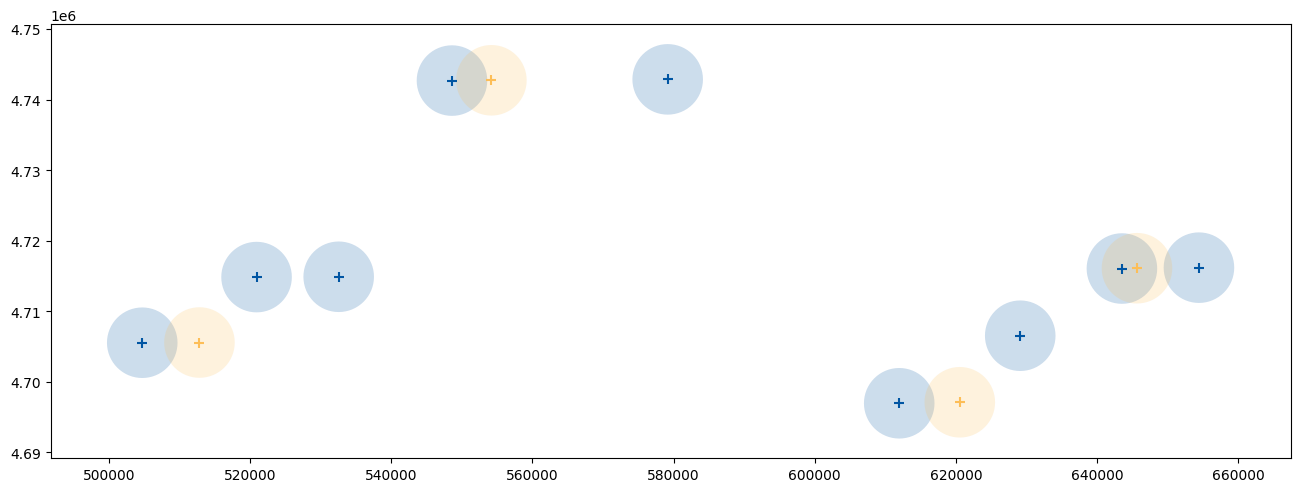

In [8]:
u_presences.plot(which='thinned', sp_threshold=10000)  # plot the presences with their spatial threshold (those kept after thinning in blue, those removed in yellow)

In [9]:
u_presencezones = PresenceZones.delimit(
    sections=u_sections,
    presences=u_presences,
    sp_threshold=10000,
    tm_threshold=5,
    tm_unit='day',
)

In [10]:
u_presencezones.presencezones  # print the presence zones GeoDataFrame

,section_id,presencezones
0,s1,"MULTIPOLYGON (((589166.78 4742872.701, 589118...."
1,s2,None
2,s3,"MULTIPOLYGON (((616117.835 4706064.327, 616733..."
3,s4,"MULTIPOLYGON (((616117.835 4706064.327, 616733..."


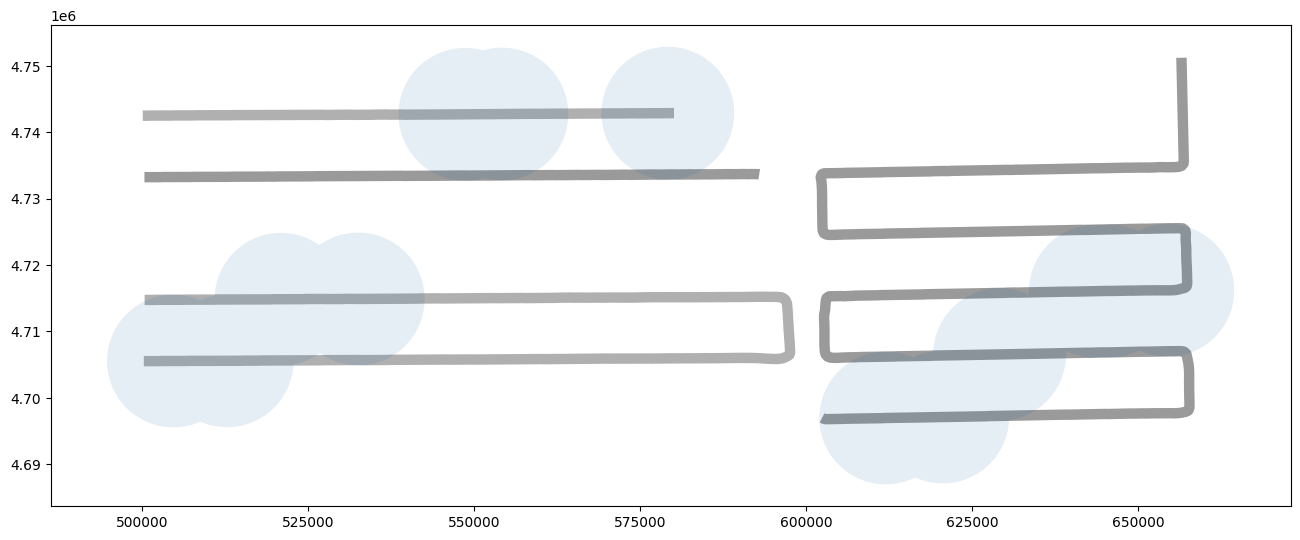

In [11]:
u_presencezones.plot(sections=u_sections)  # plot the presence zones (in blue) over the sections (in grey)

In [12]:
u_absences = Absences.delimit(
    sections=u_sections,
    presencezones=u_presencezones,
    var='along',
    target=20)
u_absences.thin(
    sp_threshold=10000,
    tm_threshold=5,
    tm_unit='day',
    target=len(u_presences.kept))

In [13]:
u_absences.full  # print the absences GeoDataFrame

,point_id,point,date
0,a01,POINT (531019.966 4742636.354),2019-01-25
1,a02,POINT (521237.882 4742599.241),2019-01-25
2,a03,POINT (516873.706 4742587.167),2019-01-25
3,a04,POINT (594345.967 4715218.118),2019-02-02
4,a05,POINT (578614.425 4705939.777),2019-02-02
5,a06,POINT (568694.462 4705909.316),2019-02-02
6,a07,POINT (525256.452 4705653.097),2019-02-02
7,a08,POINT (646596.564 4734628.006),2019-02-05
8,a09,POINT (626325.053 4734264.092),2019-02-05
9,a10,POINT (604044.651 4733836.956),2019-02-05


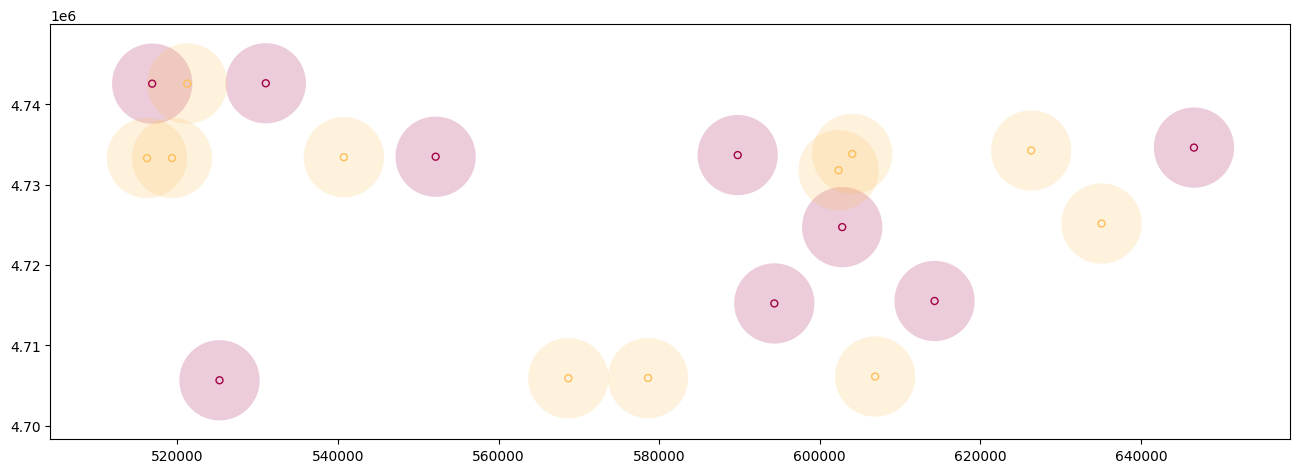

In [14]:
u_absences.plot(which='thinned', sp_threshold=10000)  # plot the absences with their spatial threshold (those kept after thinning in red, those removed in yellow)

## Stage 3
In Stage 3, we make a ```Samples``` object from the ```DataPoints``` object, the ```Presences``` object, and the ```Absences``` object.

In [15]:
u_samples = Samples.point(
    datapoints=u_sightings,
    presences=u_presences,
    absences=u_absences,
    cols=['individuals'])

## Output
Finally, we save the ```Samples``` object to the output folder.

In [16]:
u_samples.save(
    folder=output_folder,
    filetype='csv'
)

In the output folder, there should be two new CSVs: the first should have the same name as the ```Samples``` object (run the box below to see the name) while the second should also have this name but with ```-parameters``` added at the end.

In [17]:
u_samples.name

'samples-presences-sightings-+-absences-as-10000m-5day'

The first CSV should contain the samples, like those shown in the box below. 
<br>In this dataframe, each row represents a given presence or absence, i.e., a sample. 
<br>The column ```point``` delimits the location of the presence/absence.
<br>At the end are the data columns. In this particular example, they are ```p-a``` (presence-absence) and ```individuals```.

In [18]:
u_samples.samples

,point_id,point,date,datapoint_id,p-a,individuals
0,p01,POINT (579166.78 4742872.701),2019-01-25,d01,1,1.0
1,p03,POINT (548599.876 4742700.214),2019-01-25,d03,1,5.0
2,p04,POINT (520909.741 4714855.058),2019-02-02,d04,1,1.0
3,p05,POINT (532548.249 4714899.835),2019-02-02,d05,1,2.0
4,p07,POINT (504710.41 4705553.392),2019-02-02,d07,1,3.0
5,p08,POINT (654449.136 4716189.584),2019-02-05,d08,1,5.0
6,p10,POINT (643532.681 4716066.52),2019-02-05,d10,1,1.0
7,p11,POINT (629124.489 4706545.106),2019-02-05,d11,1,3.0
8,p13,POINT (611976.857 4696974.111),2019-02-05,d13,1,4.0
9,a01,POINT (531019.966 4742636.354),2019-01-25,NaN,0,NaN


The second CSV should contain the parameters, like those shown in the box below (but arranged in a table). This information may prove useful if, later, we need to know  how the samples were generated.

In [19]:
u_samples.parameters

{'approach': 'point',
 'resampled': 'datapoints',
 'presences_name': 'presences-sightings',
 'presences_crs': 'EPSG:32619',
 'presences_sp_threshold': 10000,
 'presences_tm_threshold': 5,
 'presences_tm_unit': 'day',
 'absences_name': 'absences-as-10000m-5day',
 'absences_var': 'along',
 'absences_target': 20,
 'presencezones_crs': 'EPSG:32619',
 'presencezones_sp_threshold': 10000,
 'presencezones_tm_threshold': 5,
 'presencezones_tm_unit': 'day',
 'absences_sp_threshold': 10000,
 'absences_tm_threshold': 5,
 'absences_tm_unit': 'day'}